**3a) When dealing with data from K classes in a p-dimensional space, what is the minimum number
n of samples x i ∈ R p for which S_W can be invertible? Briefly justify your answer.

Answer : S_W(Within class scatter matrix) needs to be non-singular for it to be invertible.Since Sw is a function of N−K or fewer linearly independent vectors, it's rank is N−K or less. Therefore, Sw is a singular matrix if N is less than n+K, or, analogously might be unstable if N << n. 

So the p-dimensional training samples from the original vector space are projected to a lower dimensional spaceusing PCA. Then LDA is applied next to find the best linear discriminant features on that PCA subspace. This has at most K−1 eigenvectors with non-zero, real corresponding eigenvalues.So the singularity problem of the within-class scatter matrix Sw is then overcome if the number of retained principal components varies from at least K to at most N-K PCA features.

**3b) Load the data in the file LDA-input.csv (from the lecture webpage) into Python. Use the
implementation of LinearDiscriminantAnalysis from sklearn to perform an LDA based on
the given class information. When you instantiate the LinearDiscriminantAnalysis, select
solver=’eigen’ to use the algorithm described in the lecture. Submit your code and a plot of the result.

The condition number without shrinkage: 23573178.257312734


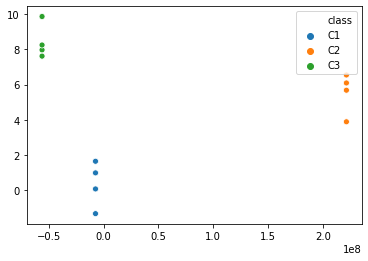

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd
from numpy import linalg as LA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


lda_data= pd.read_csv("LDA-input.csv", delimiter=',')
data_complete=pd.DataFrame(lda_data)

y=data_complete['class']
colnames=data_complete.columns
x= data_complete[colnames[:-1]]

clf= LinearDiscriminantAnalysis(solver='eigen')
lda=clf.fit_transform(X=x,y=y)
sns.scatterplot(x=lda[:,0],y=lda[:,1],hue=data_complete['class'])
print("The condition number without shrinkage:" ,LA.cond(lda))


The condition number with shrinkage: 1.4599597984108197


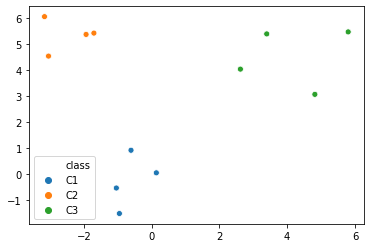

In [123]:
clf= LinearDiscriminantAnalysis(solver='eigen',shrinkage="auto")
lda1=clf.fit_transform(X=x,y=y)
sns.scatterplot(x=lda1[:,0],y=lda1[:,1],hue=data_complete['class'])
print("The condition number with shrinkage:" ,LA.cond(lda1))

**3c)I would prefer the graph which is being generated with "shrinkage=auto" because, variance within the class which is S_w cannot be properly estimated from the first graph which is without shrinkage.

**3d) Since the condition number of S_w with shrinkage is close to 1 which interprets that the matrix is far from being singular and thus, it is invertible.